# Evaluating performance of algorithms on synthetic dataset

## Preparing libraries and dataset

In [1]:
# Load packages
import scanpy as sc
import random
import pandas as pd
import numpy as np
import anndata as ad

# Load algorithms
import sys
sys.path.append('../')
from StdApproach import StdApproach
from TrajClust import TrajClust

In [2]:
# Print packages
print('\n'.join(f'{m.__name__} {m.__version__}' for m in globals().values() if getattr(m, '__version__', None)))

scanpy 1.6.0
pandas 1.1.5
numpy 1.19.4
anndata 0.7.5


In [3]:
# Set seed
seed = 1

In [4]:
# Load sample dataset
testData = sc.read("exampleDataset.h5ad")

## Performance of standard approach

Rand: 0.04172741440852647
NMI: 0.17062730770787446


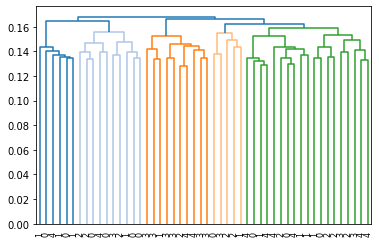

In [5]:
# Test StdApproach
result = StdApproach(testData, "CloneID", supervised = True, cloneLabel="CloneLabel", maxClusters=5, showDendogram=True, seed=seed)
print("Rand: " + str(result["rand"]))
print("NMI: " + str(result["nmi"]))

## Performance of TrajClust

100%|██████████| 50/50 [01:27<00:00,  1.75s/it]
/Users/munetomo/opt/anaconda3/envs/sca/lib/python3.8/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


Rand: 0.5980376387325076
NMI: 0.7356880540256363


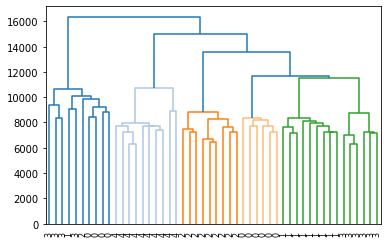

In [6]:
# Test TrajClust
result = TrajClust(testData, "CloneID", "pseudotime", supervised = True, cloneLabel="CloneLabel", maxClusters=5, showDendogram=True, seed=seed)
print("Rand: " + str(result["rand"]))
print("NMI: " + str(result["nmi"]))